## Joel Brigida

## CDA-4321: Cryptographic Engineering

### Elliptic Curve Functions

In [ ]:
# Create an Elliptic Curve over F_p with equation: y^2 = x^3 + ax + b
E = EllipticCurve(GF(p),[a,b])
print(E)

# Point at infinity.
# Note when printing point at infinity, sage will show (0:1:0)
O = E(0)
print(O)

# Point with coordinates (x,y).
# Note when printing any point other than point at infinity, sage will show (x:y:1)
x = 0
y = 2
P = E(x,y)

# Point Addition R = P + Q: Adding two points P and Q
R = P + Q

# Point Doubling R = P + P = [2]P: Doubling a point P
R = 2 * P

# Point Multiplication R = [s]P: Multiplying P by scalar s
R = s * P

# Point Inversion R = -P: P + R = point at infinity
R = -P

# Order of point P : k * P = point at infinity
k = P.order()

# Number of bits of number k. Note: number of bits of k is ⌈log_2 k⌉.
k.nbits()

### Plotting a Continuous Curve

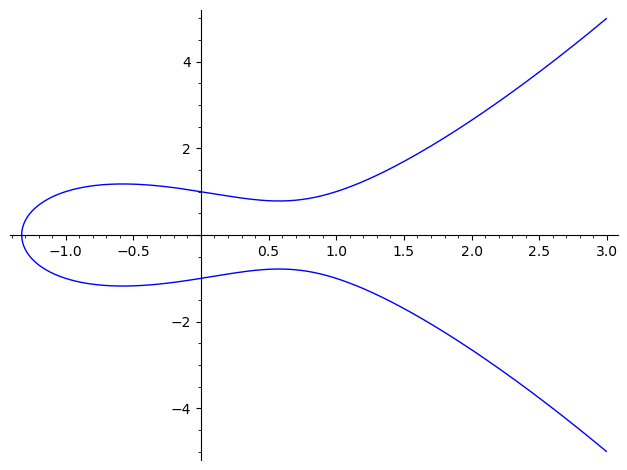

In [1]:
A = EllipticCurve([0,0,0,-1,1])
display(A.plot())

### Plotting an Elliptic Curve over a Galois Field

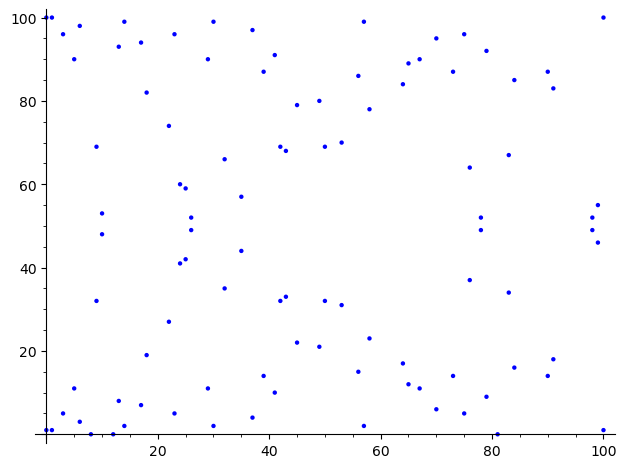

Number of points on curve B: 100


In [2]:
# GF = Galois Field = prime field

B = EllipticCurve(GF(101),[0,0,0,-1,1])

display(B.plot())
print(f'Number of points on curve B: {B.cardinality()}')

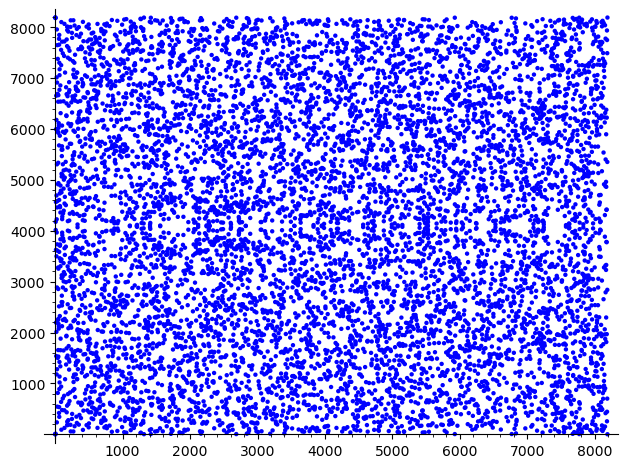

Number of points on curve C: 8237


In [3]:
# GF = Galois Field = Prime Field (discrete)

C = EllipticCurve(GF(2^13 - 1),[0,0,0,-1,1])

display(C.plot())
print(f'Number of points on curve C: {C.cardinality()}')

### Plotting Elliptic Curves - Point Addition Examples:

Source: https://doc.sagemath.org/html/en/reference/arithmetic_curves/sage/schemes/elliptic_curves/constructor.html

Long Weistrass Equation, General Form:
#### $$ y^{2} + a_{1}xy + a_{3}y = x^{3} + a_{2}x^{2} + a_{4}x + a_{6} $$

This Example:
#### $$ y^{2} = x^{3} + x + 6 $$

Suppose $ P = (2, 4) \text{ and } Q = (5, 2) $

Function Form:
```python
EllipticCurve(GF(PRIME), [a1, a2, a3, a4, a6])

E = EllipticCurve([0, 0, 0, 1, 6])

plot(E)
```

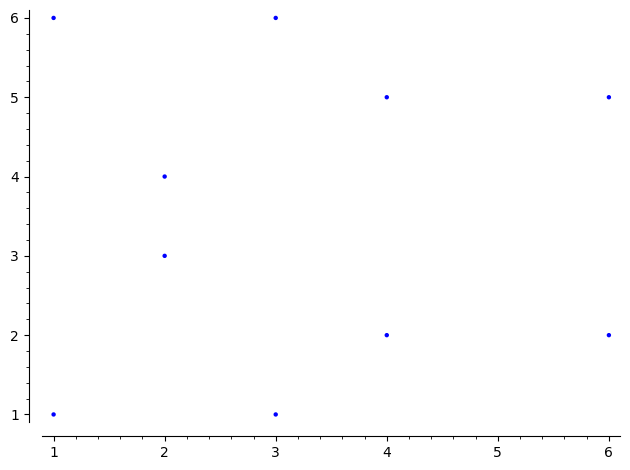

In [4]:
E = EllipticCurve(GF(7), [0, 0, 0, 1, 6])
plot(E)

In [5]:
for p in E:
    print(p)

print(f'\nOrder of E: {E.order()}')

(0 : 1 : 0)
(1 : 1 : 1)
(1 : 6 : 1)
(2 : 3 : 1)
(2 : 4 : 1)
(3 : 1 : 1)
(3 : 6 : 1)
(4 : 2 : 1)
(4 : 5 : 1)
(6 : 2 : 1)
(6 : 5 : 1)

Order of E: 11


### Point Addition and Point Doubling

In [6]:
Q = E([4,2])
P = E([6,5])

PQ = Q + P  # point addition
PP = P + P  # point doubling
PP2 = 2 * P # point doubling

print(PQ)
print(PP)
print(PP2)

(1 : 6 : 1)
(3 : 6 : 1)
(3 : 6 : 1)


### Polynomial Functions over a Galois Field

In [7]:
R.<X> = PolynomialRing(GF(2), 'X')
S.<x> = GF(2^8, modulus = X^8 + X^4 + X^3 + X + 1, repr='poly')

print(f'R = {R}')
print(f'S = {S}\n')

print(f'AES modulus is: {S.modulus()}')
print(f'Order is: {S.order()}\n')

a = x^3 + 1
b = x^6 + x^2 + 1
c = a^(-1)

print('OpA = x^3 + 1')
print('OpB = x^6 + x^2 + 1\n')
print(f'Polynomial Addition Result is: {a + b}')
print(f'Polynomial Multiplication Result is: {a * b}')
print(f'Polynomial Inversion Result is: {c}')
print(f'a * a^-1 = {a * c}\n')

for i,x in enumerate(S):
    if x == 0:
        continue
    if x.multiplicative_order() == 255:
        #print("{} {}".format(i, x))
        print(f'{i}:  {x}')


R = Univariate Polynomial Ring in X over Finite Field of size 2 (using GF2X)
S = Finite Field in x of size 2^8

AES modulus is: x^8 + x^4 + x^3 + x + 1
Order is: 256

OpA = x^3 + 1
OpB = x^6 + x^2 + 1

Polynomial Addition Result is: x^6 + x^3 + x^2
Polynomial Multiplication Result is: x^6 + x^4 + x^3 + x + 1
Polynomial Inversion Result is: x^6 + x^3 + x^2 + x + 1
a * a^-1 = 1

1:  x + 1
2:  x^2 + 1
4:  x^4 + 1
7:  x^7 + x^6 + x^5 + x^4 + x^3 + x^2 + x + 1
8:  x^4 + x^3 + x
11:  x^7 + x^4 + x^2 + x
13:  x^7 + x^6 + x^5 + x^4 + x^3
14:  x^4 + x + 1
16:  x^6 + x^4 + x^3 + x^2 + x + 1
19:  x^6 + x^3
22:  x^7 + x^4 + x^2 + 1
23:  x^7 + x^5 + x^2
26:  x^2 + x
28:  x^4 + x^3 + x^2 + x
29:  x^5 + x
31:  x^7 + x^5 + x^3 + x
32:  x^7 + x^6 + x^5 + x^2 + 1
37:  x^6 + x^4 + x^3 + 1
38:  x^7 + x^6 + x^5 + x^3 + x + 1
41:  x^7 + x^5 + x^4 + x^3 + x^2 + x
43:  x^6 + x^5 + x^4
44:  x^7 + x^4
46:  x^7 + x^6 + x^5 + x^2 + x
47:  x^5 + x^4 + 1
49:  x^7 + x^6 + x^5 + x^4 + x^2 + 1
52:  x^4 + x^2
53:  x^5 

### SBox Functions

In [8]:
R = PolynomialRing(GF(2),'x',1)
x = R.gen()
print(f'R = {R}\n')

m = x^8 + x^4 + x^3 + x + 1
print(f'AES modulus is: {m}\n')

y = x^7 + x^4 + x^2 + 1
print(f'SBox Input is: {y}\n')

# Coefficients of the S-Box, as determined through Lagrange interpolation
a = x^2 + 1
b = x^3 + 1
c = x^7 + x^6 + x^5 + x^4 + x^3 + 1
d = x^5 + x^2 + 1
e = x^7 + x^6 + x^5 + x^4 + x^2
f = 1
g = x^7 + x^5 + x^4 + x^2 + 1
h = x^7 + x^3 + x^2 + x + 1

# Final S-Box Addition
v = x^6 + x^5 + x + 1

s = a*(y^254) + b*(y^253) + c*(y^251) + d*(y^247) + e*(y^239) + f*(y^223) + g*(y^191) + h*(y^127) + v

print(f's % m = {s % m}')

R = Multivariate Polynomial Ring in x over Finite Field of size 2

AES modulus is: x^8 + x^4 + x^3 + x + 1

SBox Input is: x^7 + x^4 + x^2 + 1

s % m = x^5 + x^3 + x
